# WeatherPy

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

Call current weather data for ONE location: <br>
api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [3]:
# Check if URL and API key works for the city of London...
test_url = f'http://api.openweathermap.org/data/2.5/weather?q=london&appid={weather_api_key}'
test_response = requests.get(test_url)
print(test_response)

<Response [200]>


In [4]:
# Check json format
test_response.json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 278.54,
  'feels_like': 274.03,
  'temp_min': 277.15,
  'temp_max': 280.37,
  'pressure': 1028,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 3.09, 'deg': 350},
 'clouds': {'all': 90},
 'dt': 1615121137,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1615098752,
  'sunset': 1615139446},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [6]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# set up lists to hold reponse info
name = []
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []

# log count
count = 0
set_count = 1

In [8]:
print('''
Beginning Data Retrieval
------------------------------------------------
''')

# Loop through the list of cities and perform a request for data
# Handle exceptions for a city that is not available in the WeatherMap API
for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
             
        count += 1
        print(f'Processing Record {count} | {city}')

    except:
        print(f'{city} not found. Skipping...')
        pass

print('''
------------------------------------------------
Data Retrieval Complete
------------------------------------------------
''')


Beginning Data Retrieval
------------------------------------------------

Processing Record 1 | sao felix do xingu
Processing Record 2 | mayumba
Processing Record 3 | cherskiy
Processing Record 4 | mbini
Processing Record 5 | faya
Processing Record 6 | puerto ayora
Processing Record 7 | busselton
Processing Record 8 | maputo
Processing Record 9 | mataura
Processing Record 10 | new norfolk
Processing Record 11 | vanimo
Processing Record 12 | yellowknife
Processing Record 13 | nhulunbuy
Processing Record 14 | sabana de torres
Processing Record 15 | kisii
nizhneyansk not found. Skipping...
Processing Record 16 | cabo san lucas
Processing Record 17 | guanare
Processing Record 18 | alice springs
Processing Record 19 | ambon
Processing Record 20 | gushikawa
Processing Record 21 | boa vista
Processing Record 22 | petropavlovsk-kamchatskiy
Processing Record 23 | kapaa
Processing Record 24 | xifeng
Processing Record 25 | hithadhoo
Processing Record 26 | karabanovo
taolanaro not found. Skippin

Processing Record 228 | antalaha
mys shmidta not found. Skipping...
Processing Record 229 | mnogovershinnyy
achisay not found. Skipping...
belushya guba not found. Skipping...
Processing Record 230 | portobelo
Processing Record 231 | ucluelet
Processing Record 232 | yenagoa
Processing Record 233 | buzdyak
Processing Record 234 | saint-philippe
Processing Record 235 | les cayes
Processing Record 236 | umm lajj
Processing Record 237 | swellendam
Processing Record 238 | kaitangata
Processing Record 239 | ilave
Processing Record 240 | tansen
Processing Record 241 | east london
Processing Record 242 | marsh harbour
yanan not found. Skipping...
doctor pedro p. pena not found. Skipping...
Processing Record 243 | nelson bay
Processing Record 244 | maneadero
Processing Record 245 | fethiye
Processing Record 246 | moranbah
Processing Record 247 | pevek
umzimvubu not found. Skipping...
Processing Record 248 | juba
Processing Record 249 | koslan
Processing Record 250 | talavera
Processing Record 2

Processing Record 453 | parambu
Processing Record 454 | bardsir
Processing Record 455 | pasighat
Processing Record 456 | san policarpo
buqayq not found. Skipping...
Processing Record 457 | makat
Processing Record 458 | poya
Processing Record 459 | gondanglegi
Processing Record 460 | kalmunai
uralskiy not found. Skipping...
Processing Record 461 | bilma
Processing Record 462 | lodja
Processing Record 463 | kirakira
Processing Record 464 | fuyu
Processing Record 465 | clovis
Processing Record 466 | kahului
Processing Record 467 | eucaliptus
Processing Record 468 | sauk rapids
Processing Record 469 | banjar
Processing Record 470 | arvika
Processing Record 471 | sao joao da barra
Processing Record 472 | jacareacanga
Processing Record 473 | lopukhiv
Processing Record 474 | saryagash
Processing Record 475 | wajima
Processing Record 476 | fort nelson
Processing Record 477 | gazojak
Processing Record 478 | kargalinskaya
Processing Record 479 | almaznyy
palabuhanratu not found. Skipping...
Proc

## Convert Raw Data to DataFrame

Export the city data into a .csv
Display the DataFrame <br>

In [9]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)

In [10]:
weather_data.to_csv("./output_data/cities.csv", encoding="utf-8", index=False, header=True)

In [11]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São Félix do Xingu,-6.6447,-51.9950,29.14,67,1,0.82,BR,1615121431
1,Mayumba,-3.4320,10.6554,28.24,74,100,3.13,GA,1615121431
2,Cherskiy,68.7500,161.3000,-28.57,88,99,2.84,RU,1615121432
3,Mbini,1.5740,9.6134,31.00,74,40,2.57,GQ,1615121432
4,Faya,18.3851,42.4509,24.00,18,4,6.17,SA,1615121432
...,...,...,...,...,...,...,...,...,...
578,Tāybād,34.7400,60.7756,16.70,29,0,5.06,IR,1615121584
579,Khovd,48.0056,91.6419,-3.58,63,1,0.25,MN,1615121584
580,Staphorst,52.6450,6.2111,5.56,65,100,0.45,NL,1615121584
581,Paamiut,61.9940,-49.6678,-0.43,98,100,3.90,GL,1615121584


In [12]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,21.250844,12.984111,12.259623,69.878216,48.125214,3.669794,1.615121e+09
std,32.137194,90.468159,16.607488,22.670748,41.455351,2.379493,7.563927e+01
min,-54.800000,-179.166700,-35.120000,4.000000,0.000000,0.170000,1.615121e+09
25%,-3.457650,-68.904750,1.000000,60.000000,1.000000,1.750000,1.615121e+09
50%,26.550000,16.119400,16.820000,75.000000,40.000000,3.090000,1.615122e+09
75%,47.749550,91.854300,25.810000,87.000000,92.500000,5.095000,1.615122e+09
max,78.218600,179.316700,42.910000,100.000000,100.000000,12.560000,1.615122e+09


## Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [13]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,21.250844,12.984111,12.259623,69.878216,48.125214,3.669794,1.615121e+09
std,32.137194,90.468159,16.607488,22.670748,41.455351,2.379493,7.563927e+01
min,-54.800000,-179.166700,-35.120000,4.000000,0.000000,0.170000,1.615121e+09
25%,-3.457650,-68.904750,1.000000,60.000000,1.000000,1.750000,1.615121e+09
50%,26.550000,16.119400,16.820000,75.000000,40.000000,3.090000,1.615122e+09
75%,47.749550,91.854300,25.810000,87.000000,92.500000,5.095000,1.615122e+09
max,78.218600,179.316700,42.910000,100.000000,100.000000,12.560000,1.615122e+09


#### Max humidity result from the summary statistics shows 100%

In [14]:
# double check max value of humidity from the weather_data
weather_data['Humidity'].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

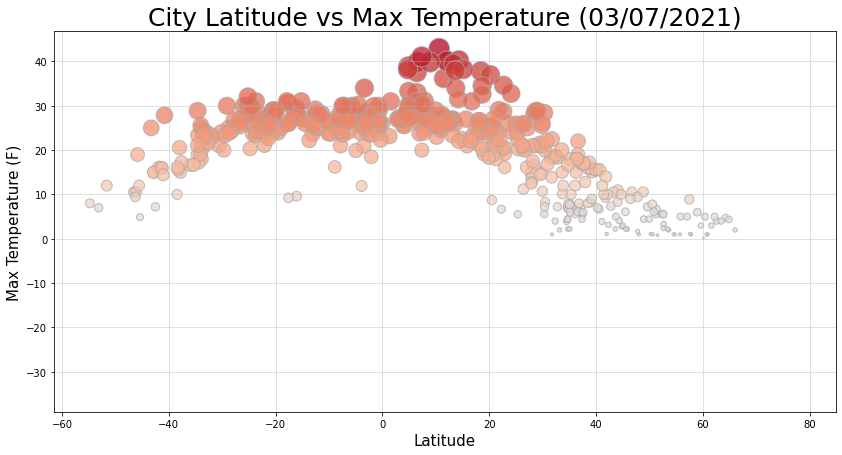

In [16]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=10*y_values, c=y_values, edgecolors='darkgrey', cmap='coolwarm', alpha=.75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('City Latitude vs Max Temperature (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp')
plt.show()

The City Latitude vs Max Temperature scatterplot shows a trend of decline on temeperature for cities in the northern latitude. Cities within range of 0-20 latitude, which is slightly above the equator, shows the highest max fareinheit temperature.

### Latitude vs. Humidity Plot

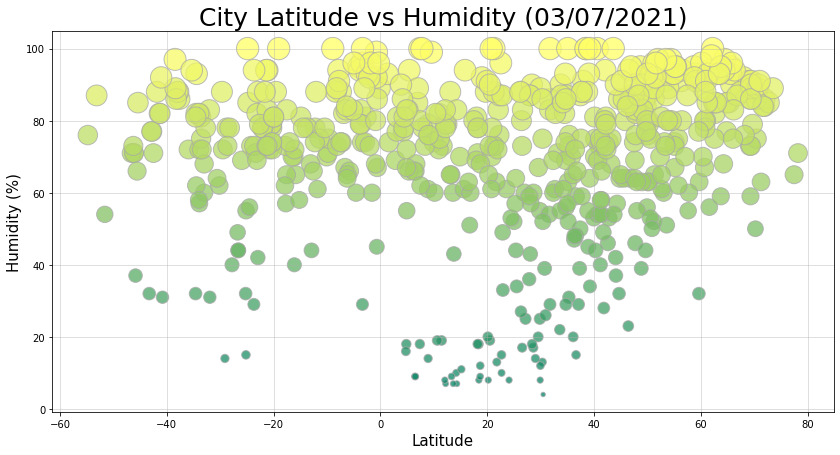

In [17]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values,s=5*y_values, c=y_values, edgecolors='darkgrey', cmap='summer', alpha=.75)
plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('City Latitude vs Humidity (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum')
plt.show()

The City Latitude vs Humidity scatterplot shows high humidity rate doesn't have any correlation on where the city latitude falls into. However comparing the number of cities that has high humidity rate vs number of city with low humitdity rate, the plot shows that there are more number of cities that has higher humidity rate, which is 60%. 


### Latitude vs. Cloudiness Plot

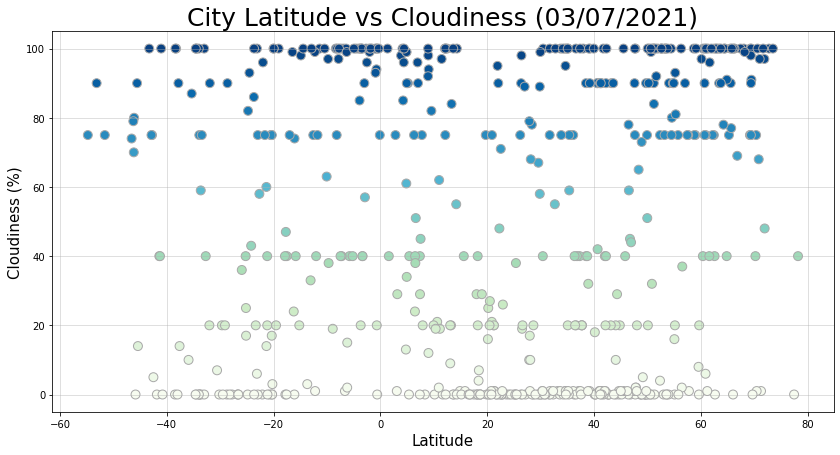

In [18]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=80, c=y_values, edgecolors='darkgrey', cmap='GnBu')
plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('City Latitude vs Cloudiness (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud')
plt.show()

The City Latitude vs Cloudiness scatterplot shows rate of cloudiness doesn't have any correlation on where the city latitude falls into. However, the plot shows most cities either have really low rate or really high rate of cloudiness, as compare to an average clousiness rate. 

### Latitude vs. Wind Speed Plot

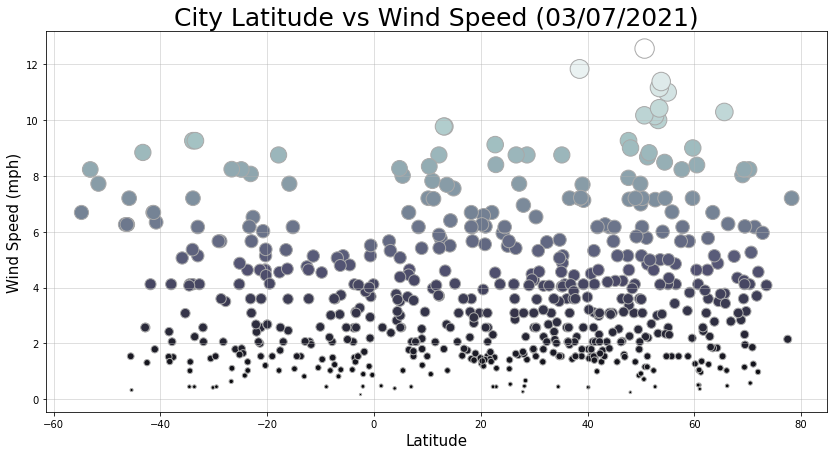

In [19]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.figure(figsize=(14,7), facecolor='white')

plt.scatter(x_values,y_values, s=30*y_values, c=y_values, edgecolors='darkgrey', cmap='bone')
plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('City Latitude vs Wind Speed (03/07/2021)', size=25)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind')
plt.show()

The City Latitude vs Wind Speed scatterplot shows rate of wind speed doesn't have any correlation on where the city latitude falls into. The only weak trend that can be concluded is that most of the cities with the highest wind speed of above 10 mph is found in the northern latitude.

## Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
NHemisphere = weather_data.loc[weather_data['Lat'] > 0]

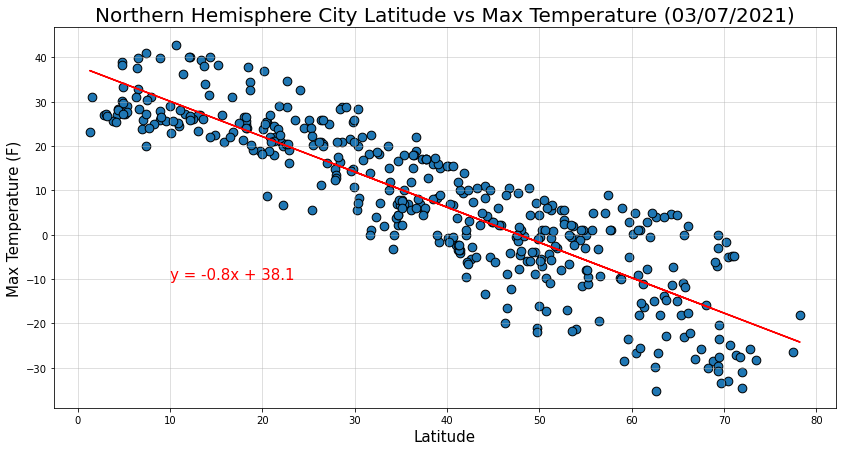

The r-value is: -0.8813923063153509


In [21]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('Northern Hemisphere City Latitude vs Max Temperature (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
SHemisphere = weather_data.loc[weather_data['Lat'] < 0]

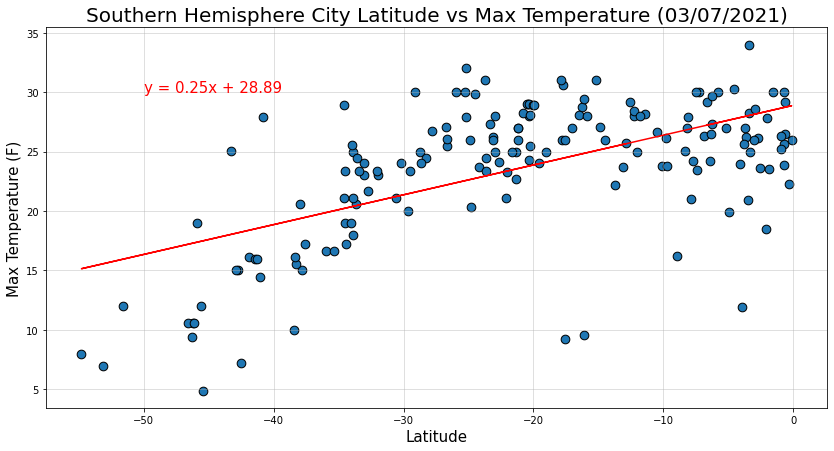

The r-value is: 0.5944704844965275


In [23]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Max Temperature (F)', size=15)
plt.title('Southern Hemisphere City Latitude vs Max Temperature (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Temp-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Temperature (F) vs. Latitude Comparison

- N. Hemisphere shows a strong negative linear association between the temperature and latitude.
- S. Hemisphere shows a moderetaly strong positive linear association between the temperature and latitude with a few potential outliers. 

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

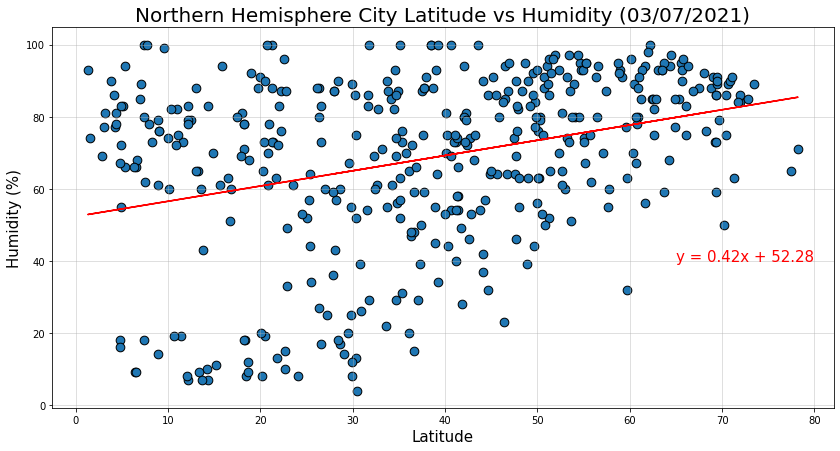

The r-value is: 0.33357905070523064


In [24]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(65,40),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('Northern Hemisphere City Latitude vs Humidity (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

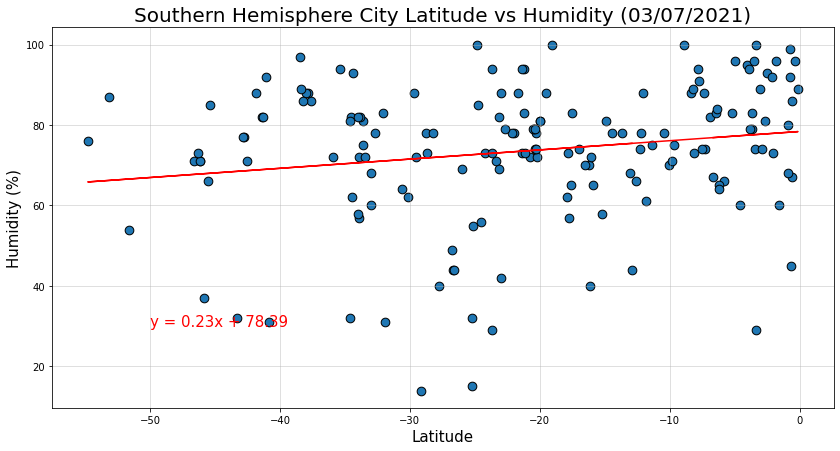

The r-value is: 0.184081614940017


In [25]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Humidity (%)', size=15)
plt.title('Southern Hemisphere City Latitude vs Humidity (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Hum-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Temperature (F) vs. Humidity Comparison

- N. Hemisphere shows a weak positive linear association between the humidity and latitude. The closer to the equator, the greater the outliers.
- S. Hemisphere shows a very weak positive linear association between the temperature and latitude with a few outliers. 

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

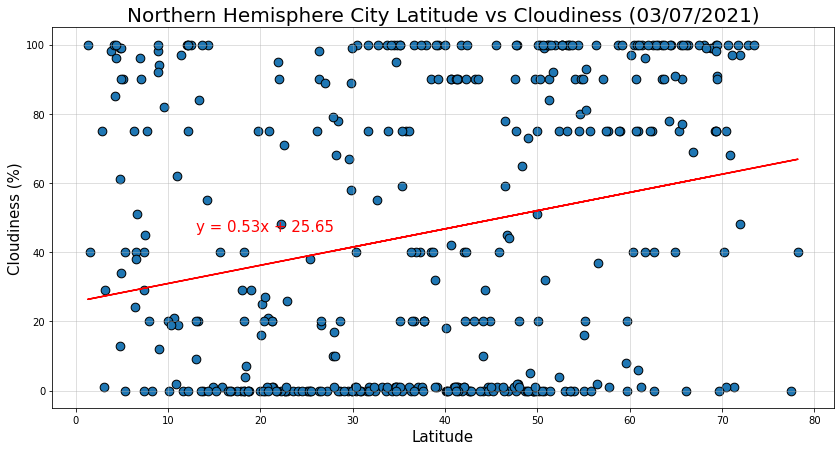

The r-value is: 0.24222668824865012


In [26]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(13,46),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('Northern Hemisphere City Latitude vs Cloudiness (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

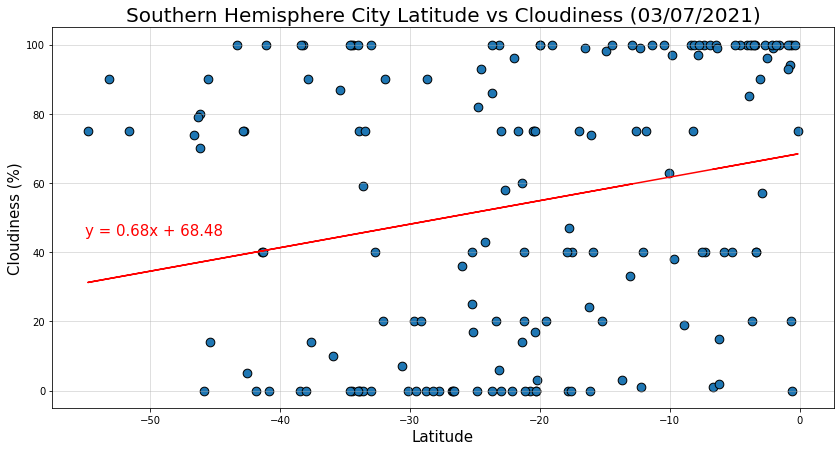

The r-value is: 0.2347184651842278


In [27]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,45),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Cloudiness (%)', size=15)
plt.title('Southern Hemisphere City Latitude vs Cloudiness (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Cloud-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere -  Cloudiness (%) vs. Latitude Comparison

Both plot shows weak positive linear association between the humidity and cloudiness. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = NHemisphere['Lat']
y_values = NHemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('Northern Hemisphere City Latitude vs Wind Speed (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind-N')
plt.show()

print(f"The r-value is: {rvalue}")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = SHemisphere['Lat']
y_values = SHemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(14,7), facecolor='white')
plt.scatter(x_values,y_values, edgecolors='black', s=75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,6.5),fontsize=15,color="red")

plt.xlabel('Latitude', size=15)
plt.ylabel('Wind Speed (mph)', size=15)
plt.title('Southern Hemisphere City Latitude vs Wind Speed (03/07/2021)', size=20)
plt.grid(b=True, alpha=.5)

plt.savefig('./output_data/Lat_vs_Wind-S')
plt.show()

print(f"The r-value is: {rvalue}")

#### Northern Hemisphere & Southern Hemisphere - Latitude vs Wind Speed Comparison

- N. Hemisphere shows no relationship between the latitude and the wind speed.
- S. Hemisphere shows a very weak negative linear association between the latitude and the wind speed with a few outliers.